This research effort examines every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, drinks, coffee and tea, milkshakes, and desserts, has its nutrition information analyzed in this dataset.

We will focus on the correlation between Calories and other independent variables.

In [11]:
# Setting up my environment by loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# This line tells Jupyter to display Matplotlib plots directly in the output of the notebook.
import seaborn as sns
import plotly.express as px

In [8]:
# Importing the dataset

df = pd.read_csv('Menu.csv')
df.head()    # It will show first 5 rows of the dataset as a sample

Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0                             25        0.0  ...             31   
1                             15        0.0  ...             30   
2                             42        0.0  ...             29   
3                             52        0.0  ...             30   
4                             42        0.0  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 24 columns]

In [13]:
# Reviewing summary of the dataset

df.describe(include='all')

Category          Item  Serving Size     Calories  \
count            260           260           260   260.000000   
unique             9           260           107          NaN   
top     Coffee & Tea  Egg McMuffin  16 fl oz cup          NaN   
freq              95             1            45          NaN   
mean             NaN           NaN           NaN   368.269231   
std              NaN           NaN           NaN   240.269886   
min              NaN           NaN           NaN     0.000000   
25%              NaN           NaN           NaN   210.000000   
50%              NaN           NaN           NaN   340.000000   
75%              NaN           NaN           NaN   500.000000   
max              NaN           NaN           NaN  1880.000000   

        Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count          260.000000  260.000000                 260.000000   
unique                NaN         NaN                        NaN   
top                   NaN         NaN                        NaN   
freq                  NaN         NaN                        NaN   
mean           127.096154   14.165385                  21.815385   
std            127.875914   14.205998                  21.885199   
min              0.000000    0.000000                   0.000000   
25%             20.000000    2.375000                   3.750000   
50%            100.000000   11.000000                  17.000000   
75%            200.000000   22.250000                  35.000000   
max           1060.000000  118.000000                 182.000000   

        Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  ...  \
count      260.000000                     260.000000  260.000000  ...   
unique            NaN                            NaN         NaN  ...   
top               NaN                            NaN         NaN  ...   
freq              NaN                            NaN         NaN  ...   
mean         6.007692                      29.965385    0.203846  ...   
std          5.321873                      26.639209    0.429133  ...   
min          0.000000                       0.000000    0.000000  ...   
25%          1.000000                       4.750000    0.000000  ...   
50%          5.000000                      24.000000    0.000000  ...   
75%         10.000000                      48.000000    0.000000  ...   
max         20.000000                     102.000000    2.500000  ...   

        Carbohydrates  Carbohydrates (% Daily Value)  Dietary Fiber  \
count      260.000000                     260.000000     260.000000   
unique            NaN                            NaN            NaN   
top               NaN                            NaN            NaN   
freq              NaN                            NaN            NaN   
mean        47.346154                      15.780769       1.630769   
std         28.252232                       9.419544       1.567717   
min          0.000000                       0.000000       0.000000   
25%         30.000000                      10.000000       0.000000   
50%         44.000000                      15.000000       1.000000   
75%         60.000000                      20.000000       3.000000   
max        141.000000                      47.000000       7.000000   

        Dietary Fiber (% Daily Value)      Sugars     Protein  \
count                      260.000000  260.000000  260.000000   
unique                            NaN         NaN         NaN   
top                               NaN         NaN         NaN   
freq                              NaN         NaN         NaN   
mean                         6.530769   29.423077   13.338462   
std                          6.307057   28.679797   11.426146   
min                          0.000000    0.000000    0.000000   
25%                          0.000000    5.750000    4.000000   
50%                          5.000000   17.500000   12.000000   
75%                         10.000

In [14]:
max_values = df[['Calories','Total Fat','Carbohydrates','Dietary Fiber','Sugars','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)']].max()

print(max_values)

Calories                     1880.0
Total Fat                     118.0
Carbohydrates                 141.0
Dietary Fiber                   7.0
Sugars                        128.0
Protein                        87.0
Vitamin A (% Daily Value)     170.0
Vitamin C (% Daily Value)     240.0
Calcium (% Daily Value)        70.0
Iron (% Daily Value)           40.0
dtype: float64


According to the dataset summary, max value for Calores and other variables seems to be high.
We first check to see infact there is any correlation between Calories and other independent variables by plotting a correlation matrix next.


Text(0.5, 1.0, 'Correlation Matrix')

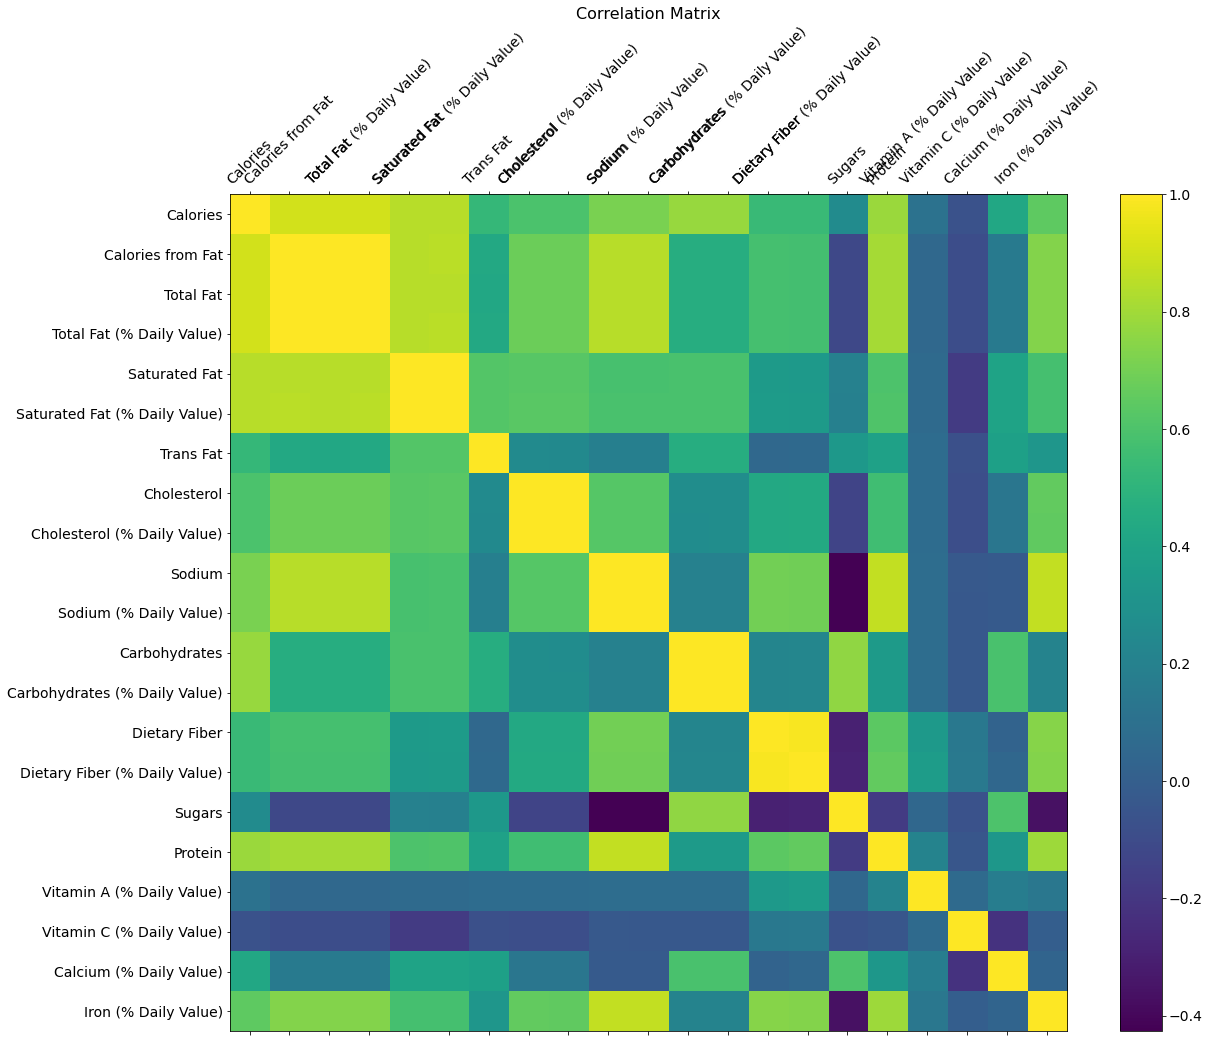

In [23]:
# Plotting correlation matrix for dataset

f = plt.figure(figsize=(19,15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 14, rotation = 45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 16)

* It is drawn on a figure size ->so that axis labels can match the dataframe
* plt.matshow() -> This function is used to represent an array as a matrix in a new figure window
* The x-axis tick labels are placed at the top
* Colorbar legend to interpret the color scale.(on right side)
* As we know df.corr() method ignores non-numerical columns, '.select_dtypes(['number'])' should be used when defining the x and y labels to avoid an unwanted shift of the labels
* We will adjust the size and rotation of the labels 
* We will also use figure ratio that makes the colorbar and the main figure come out the same height.
* The correlation coefficients are proportionate to the box's size and color intensity.
* As we can see variable[Calorie], has strong correlations with all of the other independent variables, whether they are positive or negative.

<AxesSubplot:xlabel='Calories', ylabel='Category'>

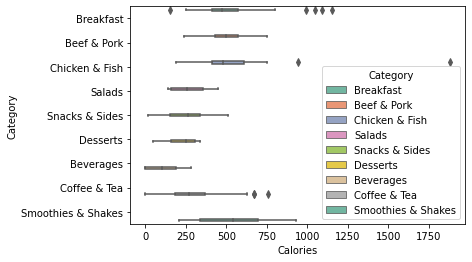

In [40]:
# Boxplot for Calories vs Category to spot outliers and max calories category

sns.boxplot(x = df['Calories'],y = df['Category'],  hue = df['Category'], palette = 'Set2')


<AxesSubplot:xlabel='Calories', ylabel='Category'>

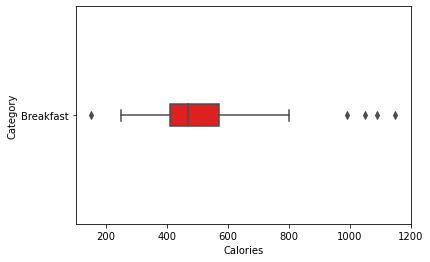

In [41]:
# If we wanted to create a separate boxplot for a specific category & customized its width(0.1)

sns.boxplot(x=df[df['Category'] == 'Breakfast']['Calories'], y=df['Category'][df['Category'] == 'Breakfast'], color='red', width=0.1)

From the above boxplot in ln[40], we notice quite a no. of outliers

##### Now, let's figure out which exact item contain high calories  in the category.

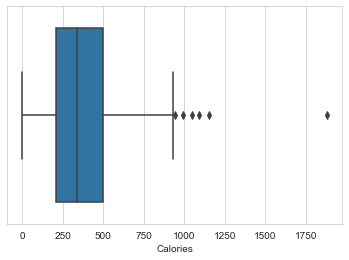

In [43]:
# Plotting boxplot to look for high Calories outliers

plot = sns.set_style('whitegrid')
ax = sns.boxplot(x=df['Calories'])

In [44]:
# using .idmax() to get the index of the item

df['Calories'].idxmax()

82

In [45]:
# Using .at[] to get the exact item

df.at[82, 'Item']

'Chicken McNuggets (40 piece)'

#### Chicken McNuggets (40 piece) is the winner here.

We will now perform the same proces to find other categories and items.

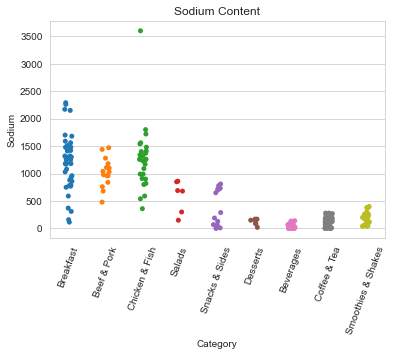

In [46]:
# Sodium vs Category
plot=sns.stripplot(x="Category", y='Sodium', data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium Content')
plt.show()

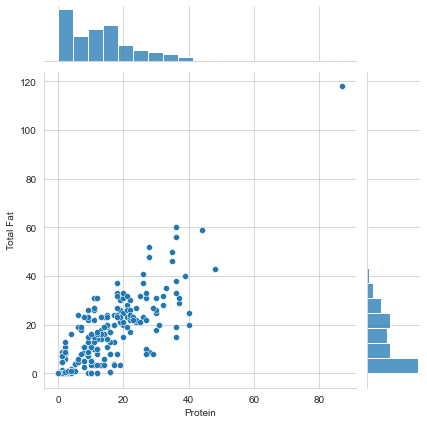

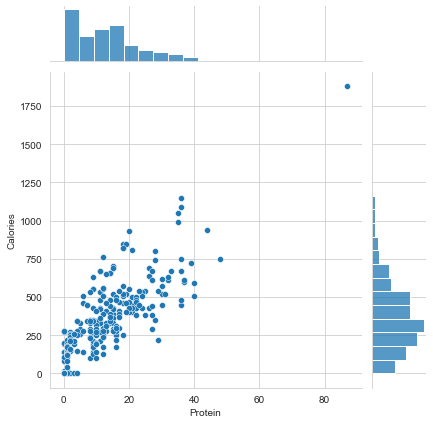

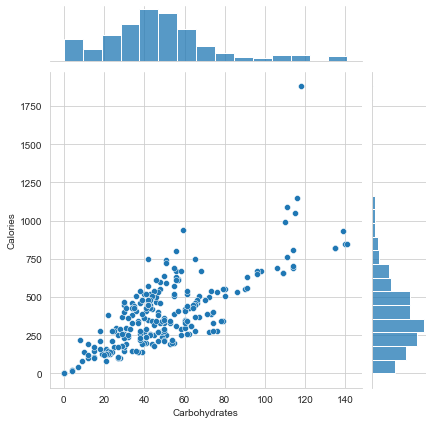

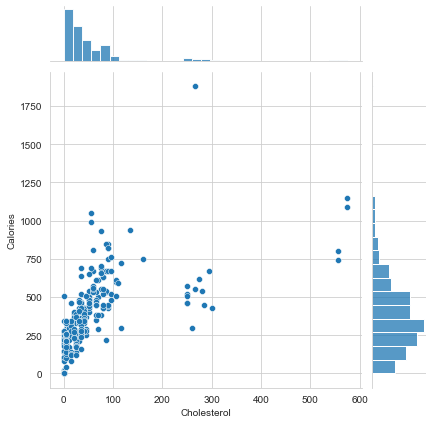

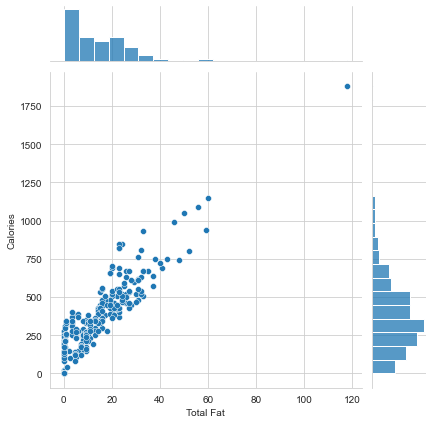

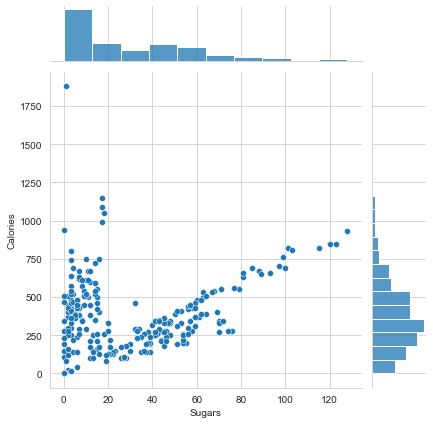

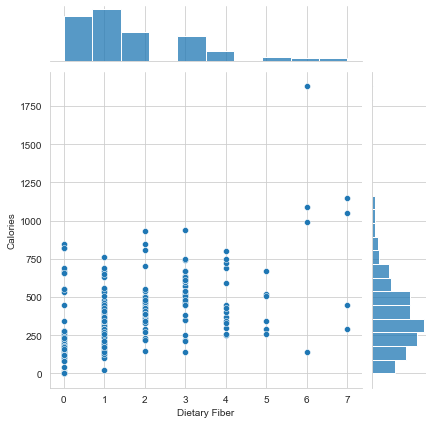

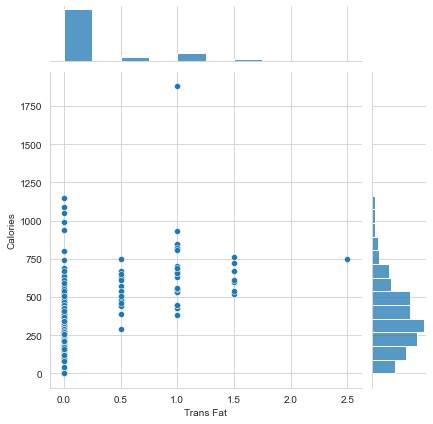

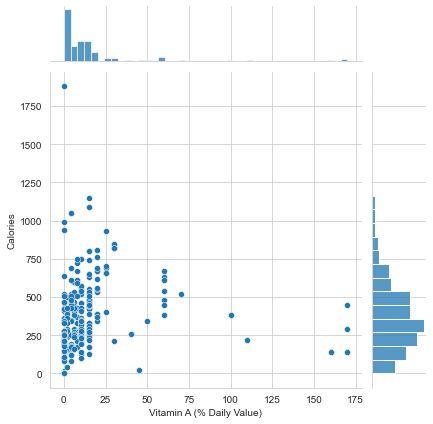

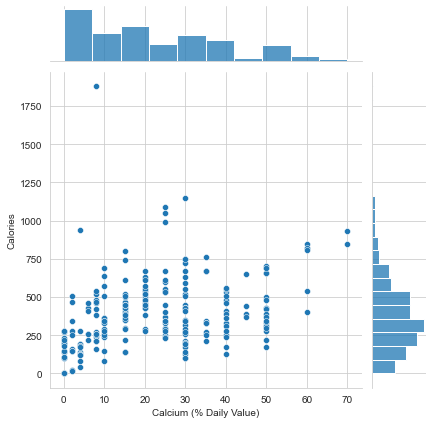

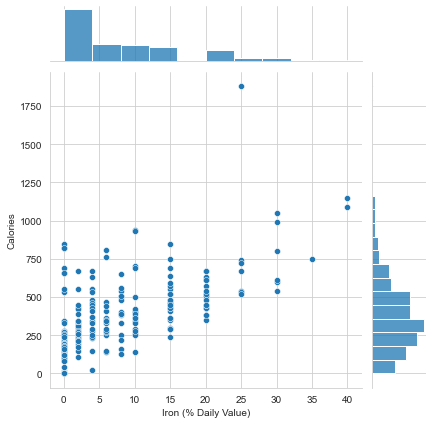

In [52]:
# Protein vs Total Fat
plot=sns.jointplot(x="Protein", y='Total Fat', data=df)

# Calories vs Protein
plot=sns.jointplot(x="Protein", y='Calories', data=df)

# Calories vs Carbohydrates
plot=sns.jointplot(x="Carbohydrates", y='Calories', data=df)

# Calories vs Cholesterol
plot=sns.jointplot(x="Cholesterol", y='Calories', data=df)

# Calories vs Total Fat 
plot=sns.jointplot(x="Total Fat", y='Calories', data=df)

# Calories vs Sugars
plot=sns.jointplot(x="Sugars", y='Calories', data=df)

# Calories vs Dietary Fiber
plot=sns.jointplot(x="Dietary Fiber", y='Calories', data=df)

# Calories vs Trans Fat
plot=sns.jointplot(x="Trans Fat", y='Calories', data=df)

# Calories vs Vitamin A
plot=sns.jointplot(x="Vitamin A (% Daily Value)", y='Calories', data=df)

# Calories vs Calcium
plot=sns.jointplot(x="Calcium (% Daily Value)", y='Calories', data=df)

# Calories vs Iron
plot=sns.jointplot(x="Iron (% Daily Value)", y='Calories', data=df)

In [53]:
df['Sodium'].idxmax()

82

In [54]:
df.at[82, 'Item']

'Chicken McNuggets (40 piece)'

In [55]:
df['Protein'].idxmax()

82

In [56]:
df.at[82, 'Item']

'Chicken McNuggets (40 piece)'

In [57]:
df['Carbohydrates'].idxmax()

249

In [58]:
df.at[249, 'Item']

'Chocolate Shake (Large)'

In [59]:
df['Cholesterol'].idxmax()

31

In [60]:
df.at[31, 'Item']

'Big Breakfast with Hotcakes (Regular Biscuit)'

In [61]:
df['Total Fat'].idxmax()

82

In [62]:
df.at[82, 'Item']

'Chicken McNuggets (40 piece)'

In [63]:
df['Sugars'].idxmax()

253

In [64]:
df.at[253, 'Item']

'McFlurry with M&M’s Candies (Medium)'

In [65]:
df['Dietary Fiber'].idxmax()

32

In [66]:
df.at[32, 'Item']

'Big Breakfast with Hotcakes (Large Biscuit)'

In [67]:
df['Trans Fat'].idxmax()

47

In [68]:
df.at[47, 'Item']

'Double Quarter Pounder with Cheese'

In [69]:
df['Vitamin A (% Daily Value)'].idxmax()

84

In [70]:
df.at[84, 'Item']

'Premium Bacon Ranch Salad (without Chicken)'

In [71]:
df['Calcium (% Daily Value)'].idxmax()

246

In [72]:
df.at[246, 'Item']

'Strawberry Shake (Large)'

In [73]:
df['Iron (% Daily Value)'].idxmax()

31

In [74]:
df.at[31, 'Item']

'Big Breakfast with Hotcakes (Regular Biscuit)'

#### As ranked by Calories using unique Category and items with high calories

* Chicken & Fish: Chicken McNuggets (40 piece) - 1880kcal
* Breakfast: Big Breakfast with Hotcakes (Large Biscuit) - 1150kcal
* Smoothies & Shakes: McFlurry with M&M’s Candies (Medium) - 930kcal
* Beef & Pork: Double Quarter Pounder with Cheese - 750kcal
* Snacks & Sides: Large French Fries - 510kcal
* Desserts: Hot Caramel Sundae - 340kcalkcal
* Beverages: Minute Maid Orange Juice (Large) - 280kcal

In [75]:
# creating a list with our ranked list by Calories

lists=["Chicken & Fish","Breakfast","Smoothies & Shakes","Beef & Pork","Snacks & Sides","Desserts","Beverages"]

1 . Chicken & Fish


C:\Users\DELL\AppData\Local\Temp\ipykernel_5212\4241796964.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



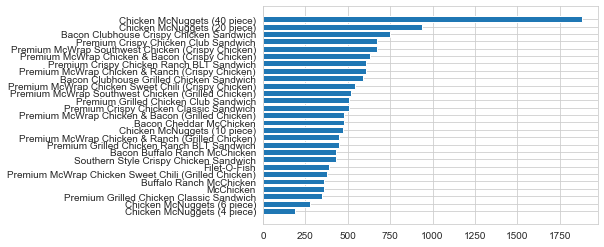

2 . Breakfast


C:\Users\DELL\AppData\Local\Temp\ipykernel_5212\4241796964.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



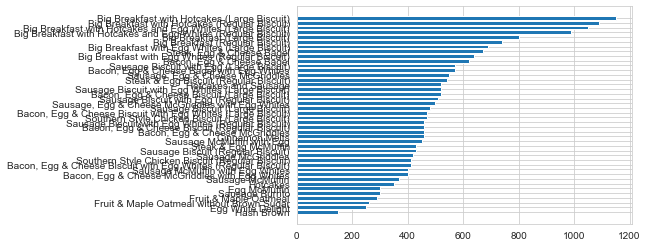

3 . Smoothies & Shakes


C:\Users\DELL\AppData\Local\Temp\ipykernel_5212\4241796964.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



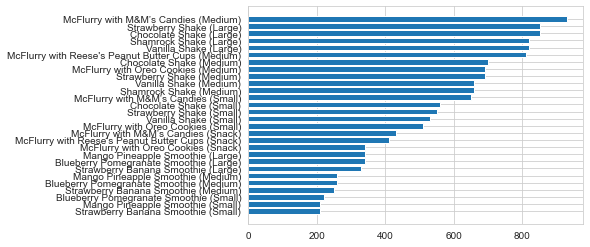

4 . Beef & Pork


C:\Users\DELL\AppData\Local\Temp\ipykernel_5212\4241796964.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



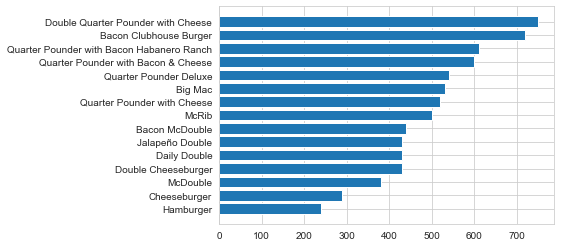

5 . Snacks & Sides


C:\Users\DELL\AppData\Local\Temp\ipykernel_5212\4241796964.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



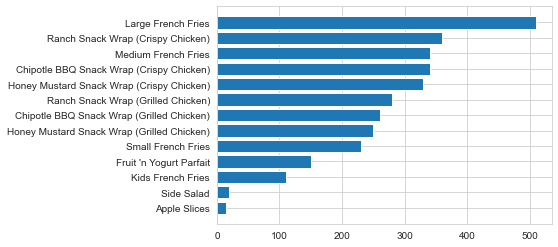

6 . Desserts


C:\Users\DELL\AppData\Local\Temp\ipykernel_5212\4241796964.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



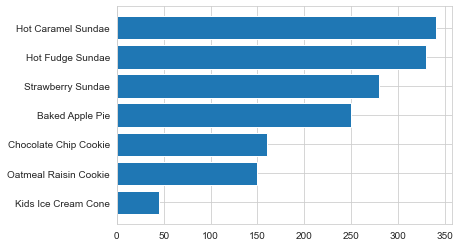

7 . Beverages


C:\Users\DELL\AppData\Local\Temp\ipykernel_5212\4241796964.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



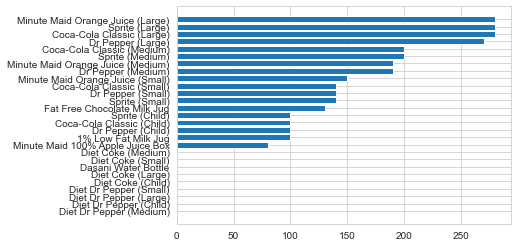

In [76]:
for list in lists:
    #items ascending=False
    items=df.query('Category == list').sort_values(by="Calories", ascending=False)
    items_custom=items.iloc[:,[1,3,5]]
    
    #items ascending=True
    items_t=df.query('Category == list').sort_values(by="Calories", ascending=True)
    items_custom_t=items_t.iloc[:,[1,3,5]]
    
    #Print Categories
    print(lists.index(list)+1,".",list)
    
    #Plotly Express
    p_express = px.scatter(items_custom, x="Total Fat",y='Calories', color="Item",size='Calories',template="plotly_dark",hover_name="Item")
    p_express.show()
    
    #Display Tables ranked by calories
    table=items_custom.iloc[:,[0,1]].sort_values(by="Calories", ascending=False).style.hide_index()
    #table=table.style.hide_index()
    display(table)
    
    #Matplotlib pyplot
    fig,ax=plt.subplots()
    x=items_custom_t.iloc[:,0]
    y=items_custom_t.iloc[:,1]
    ax.barh(x,y, tick_label=x)
    plt.show()

### Important Points:

* According to FDA, the recommended adult limit for sodium intake should be less than 2,300 milligrams per day - that's equal to about 1 teaspoon of table salt.
* NHS recommends daily calorie intake of 2,000 kcal for women and 2,500 kcal for men.
* 'Chicken McNuggets (40 piece)' was found to contain high amounts of Calories (1880 kcal), Sodium (3,600 milligrams), Protein (87 grams), and Total Fat (118 grams).
